In [1]:
# Import the dependencies.
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

In [2]:
conn = psycopg2.connect(database = "Homelessness_USA", 
                        user = "postgres", 
                        host= 'localhost',
                        password = "Nutbutt16",
                        port = 5432)

In [3]:
cur = conn.cursor()
cur.execute('SELECT * FROM Homelessness_USA;')
rows = cur.fetchone()
conn.commit()
for row in rows:
    print(row)

2014
AK
1784
397
202
1185
799
984
1
0
1720
64
653
142
14
781
50
144
178
7
171
0
0
173
5
111
21
0
37
0
9


In [4]:
cur = conn.cursor()
cur.execute('SELECT * FROM Homelessness_USA;')
rows = cur.fetchall()
conn.commit()

In [5]:
df=pd.DataFrame(rows, columns=['Year','State','Overall_Homeless','Under_18','Age_18_to_24','Over_24','Female','Male',
                               'Transgender','Non_binary','NonHispanic_NonLatin','Hispanic_Latin','White','African_American',
                                'Asian_American','Indigenous','Pacific_Islander','Multiple_Races','Overall_Homeless_Veterans',
                                'Veterans_Female','Veterans_Male','Veterans_Transgender','Veterans_Non_binary',
                                'Veterans_NonHispanic_NonLatin','Veterans_Hispanic_Latin','Veterans_White',
                                'Veterans_African_American','Veterans_Asian_American','Veterans_Indigenous',
                                'Veterans_Pacific_Islander','Veterans_Multiple_Races',])
df.head()

,Year,State,Overall_Homeless,Under_18,Age_18_to_24,Over_24,Female,Male,Transgender,Non_binary,...,Veterans_Transgender,Veterans_Non_binary,Veterans_NonHispanic_NonLatin,Veterans_Hispanic_Latin,Veterans_White,Veterans_African_American,Veterans_Asian_American,Veterans_Indigenous,Veterans_Pacific_Islander,Veterans_Multiple_Races
0,2014,AK,1784,397,202,1185,799,984,1,0,...,0,0,173,5,111,21,0,37,0,9
1,2014,AL,4561,772,366,3423,1681,2806,4,0,...,1,0,535,2,249,282,0,2,0,4
2,2014,AR,2936,355,315,2266,1113,1098,0,0,...,0,0,241,7,143,96,1,1,0,7
3,2014,AS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,AZ,10495,2679,1024,6792,3900,5531,15,0,...,3,0,639,94,536,122,1,49,6,19


In [6]:
print(len(df))

560


In [7]:
df.columns

Index(['Year', 'State', 'Overall_Homeless', 'Under_18', 'Age_18_to_24',
       'Over_24', 'Female', 'Male', 'Transgender', 'Non_binary',
       'NonHispanic_NonLatin', 'Hispanic_Latin', 'White', 'African_American',
       'Asian_American', 'Indigenous', 'Pacific_Islander', 'Multiple_Races',
       'Overall_Homeless_Veterans', 'Veterans_Female', 'Veterans_Male',
       'Veterans_Transgender', 'Veterans_Non_binary',
       'Veterans_NonHispanic_NonLatin', 'Veterans_Hispanic_Latin',
       'Veterans_White', 'Veterans_African_American',
       'Veterans_Asian_American', 'Veterans_Indigenous',
       'Veterans_Pacific_Islander', 'Veterans_Multiple_Races'],
      dtype='object')

In [8]:
#Overall Country Population vs Country's Overall Homelessness Rate by State
overall_homelessness_us_df = pd.read_csv(r"C:\Users\jacqu\git\UofW-VIRT-DATA-PT-09-2023-U-LOLC\Project_4\Project_4\Resources\Overall_Homlessness_2007_2023V2.csv")
print(overall_homelessness_us_df)

     Year State     State name  Overall Homeless  Population  \
0    2023    AK         Alaska              2614      733406   
1    2023    AL        Alabama              3304     5108468   
2    2023    AR       Arkansas              2609     3067732   
3    2023    AZ        Arizona             14237     7431344   
4    2023    CA     California            181399    38965193   
..    ...   ...            ...               ...         ...   
862  2007    VT        Vermont              1035      623481   
863  2007    WA     Washington             23379     6461587   
864  2007    WI      Wisconsin              5648     5610775   
865  2007    WV  West Virginia              2409     1834052   
866  2007    WY        Wyoming               537      534876   

     Percent of Population  
0                   0.0036  
1                   0.0006  
2                   0.0009  
3                   0.0019  
4                   0.0047  
..                     ...  
862                 0.0017  

In [9]:
overall_homelessness_us_df.head()

,Year,State,State name,Overall Homeless,Population,Percent of Population
0,2023,AK,Alaska,2614,733406,0.0036
1,2023,AL,Alabama,3304,5108468,0.0006
2,2023,AR,Arkansas,2609,3067732,0.0009
3,2023,AZ,Arizona,14237,7431344,0.0019
4,2023,CA,California,181399,38965193,0.0047


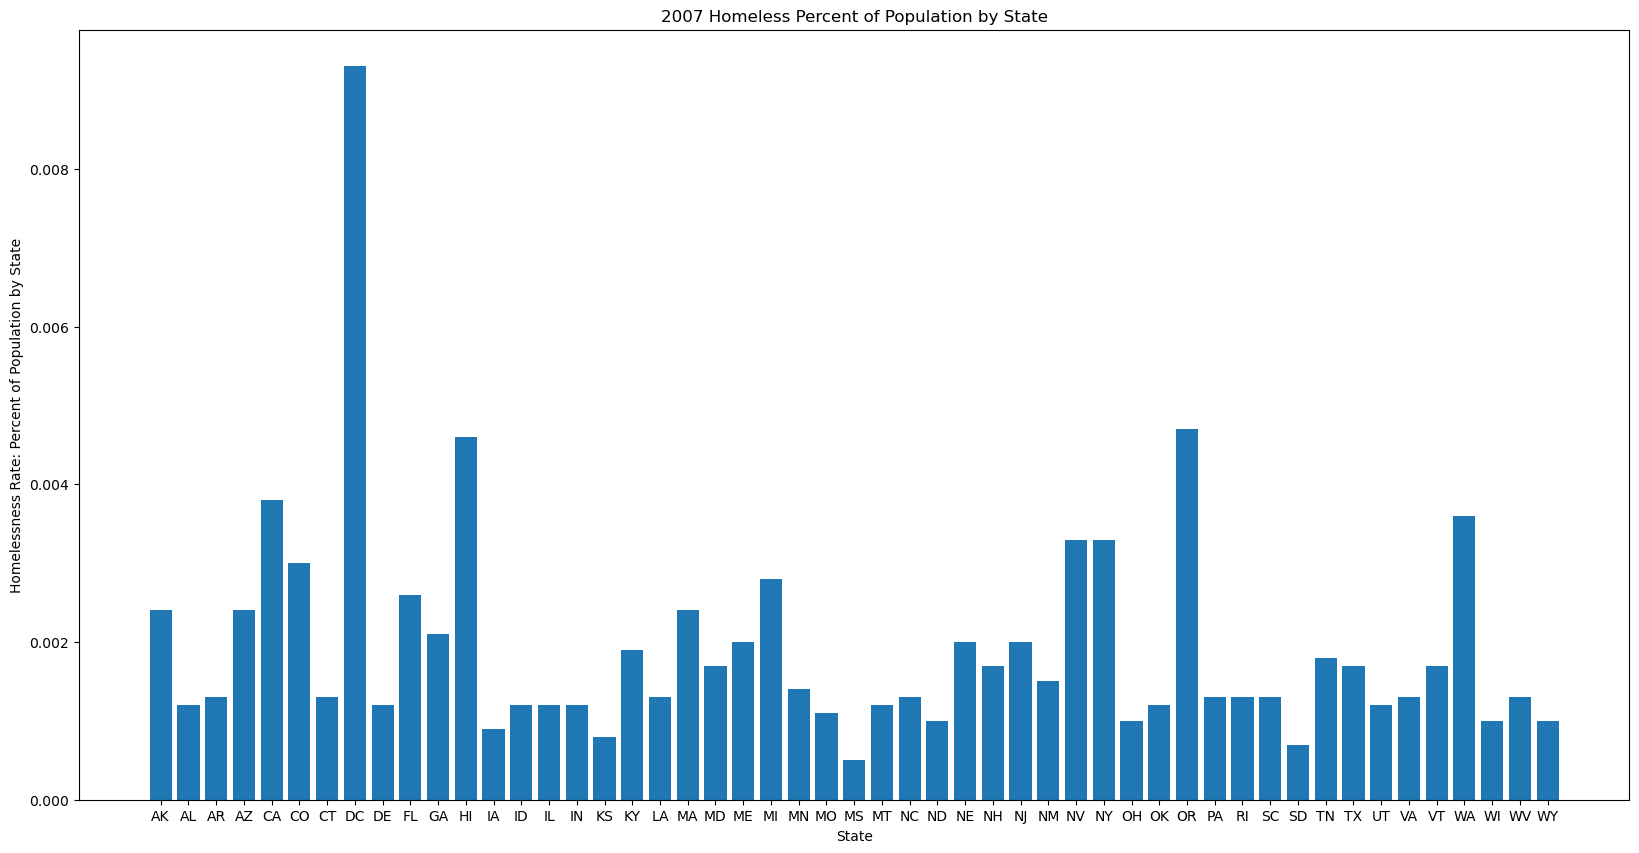

In [27]:
#Plot the Percent of Population for each state for 2007
sorted_2007 = overall_homelessness_us_df[overall_homelessness_us_df['Year'] == 2007]
sorted_2007.head()


y_axis = sorted_2007['State']
x_axis = sorted_2007['Percent of Population']

plt.figure(figsize=(20,10))
plt.bar(y_axis, x_axis)
plt.xlabel('State')
plt.ylabel("Homelessness Rate: Percent of Population by State")
plt.title("2007 Homeless Percent of Population by State")
plt.show()

# print(x_axis)

In [ ]:
# Age comparison- Average per grouping (Under 18, 18-24, over 24)

#Finding the Avgerage of each age group
below18_sorted = df["Under_18"]
below18_sorted = below18_sorted.mean().round(2)
print(f"The average homelessness rate below 18 is: ", {below18_sorted})

eightteen_to24_sorted = df["Age_18_to_24"]
eightteen_to24_sorted = eightteen_to24_sorted.mean().round(2)
print(f"The average homelessness rate of 18-24 is: ", {eightteen_to24_sorted})

above24_sorted = df["Under_18"]
above24_sorted = above24_sorted.mean().round(2)
print(f"The average homelessness rate above 24 is: ", {above24_sorted})

#Compile the Data
age_group_data = {
    "Age Group": ['Under 18', '18 to 24', 'Above 24'],
    "Average Homelessness Rate by Age Group (US)": [below18_sorted, eightteen_to24_sorted, above24_sorted]
}

#Create the DataFrame
avg_age_groups_us_total = pd.DataFrame(age_group_data)
avg_age_groups_us_total.head()

#Plot the Comparison
labels = avg_age_groups_us_total['Age Group']
sizes = avg_age_groups_us_total['Average Homelessness Rate by Age Group (US)']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Average Homelessness Rate by Age Group (US)")
plt.show()

In [ ]:
# Race comparison- Average per Race

#Finding the Avgerage of each race
non_hispanic_non_latin = df["NonHispanic_NonLatin"]
non_hispanic_non_latin = non_hispanic_non_latin.mean().round(2)
print(f"The average homelessness for Non-Hispanic/Non-Latin is: ", {non_hispanic_non_latin})

hispanic_latin = df["Hispanic_Latin"]
hispanic_latin = hispanic_latin.mean().round(2)
print(f"The average homelessness rate for Hispanic/Latin is: ", {hispanic_latin})

white = df["White"]
white = white.mean().round(2)
print(f"The average homelessness rate for White is: ", {white})

african_american = df["African_American"]
african_american = african_american.mean().round(2)
print(f"The average homelessness rate for African American is: ", {african_american})

asian_american = df["Asian_American"]
asian_american = asian_american.mean().round(2)
print(f"The average homelessness rate Asian American is: ", {asian_american})

indigenous = df["Indigenous"]
indigenous = indigenous.mean().round(2)
print(f"The average homelessness rate Indigenous is: ", {indigenous})

pacific_islander = df["Pacific_Islander"]
pacific_islander = pacific_islander.mean().round(2)
print(f"The average homelessness rate Pacific Islander is: ", {pacific_islander})

multiple_races = df["Multiple_Races"]
multiple_races = multiple_races.mean().round(2)
print(f"The average homelessness rate for Multiple Races is: ", {multiple_races})

In [ ]:
#Compile the Data
avg_race_data = {
    "Race": ['NonHispanic_NonLatin', 'Hispanic_Latin', 'White', 'African_American',
       'Asian_American', 'Indigenous', 'Pacific_Islander', 'Multiple_Races'],
    "Average Homelessness Rate by Race (US)": [non_hispanic_non_latin, hispanic_latin, white, african_american, 
                                                   asian_american, indigenous, pacific_islander, multiple_races]
}

#Create the DataFrame
avg_race_us_total = pd.DataFrame(age_group_data)
avg_race_us_total.head()

#Plot the Comparison
labels = avg_race_us_total['Race']
sizes = avg_race_us_total['Average Homelessness Rate by Race (US)']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Average Homelessness Rate by Race (US)")
plt.show()

In [ ]:
# Gender comparison- Average per gender

'Female', 'Male', 'Transgender', 'Non_binary'

#Finding the Avgerage of each gender
female_sorted = df["Female"]
female_sorted = female_sorted.mean().round(2)
print(f"The average homelessness rate for Female is: ", {female_sorted})

Male_sorted = df["Male"]
Male_sorted = Male_sorted.mean().round(2)
print(f"The average homelessness rate for Male is: ", {Male_sorted})

transgender_sorted = df["Transgender"]
transgender_sorted = transgender_sorted.mean().round(2)
print(f"The average homelessness rate for Transgender is: ", {transgender_sorted})

non_binary_sorted = df["Non_binary"]
non_binary_sorted = non_binary_sorted.mean().round(2)
print(f"The average homelessness rate for Non Binary is: ", {non_binary_sorted})

#Compile the Data
age_group_data = {
    "Gender": ['Female', 'Male', 'Transgender', 'Non_binary'],
    "Average Homelessness Rate by Gender (US)": [female_sorted, Male_sorted, transgender_sorted, non_binary_sorted]
}

#Create the DataFrame
avg_gender_us_total = pd.DataFrame(age_group_data)
avg_gender_us_total.head()

#Plot the Comparison
labels = avg_gender_us_total['Gender']
sizes = avg_gender_us_total['Average Homelessness Rate by Gender (US)']

plt.figure(figsize=(8,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Average Homelessness Rate by Gender (US)")
plt.show()

In [ ]:
df.dtypes

In [12]:
# df['State'] = df['State'].astype(int)
# df['State']
# df.columns
# df.head()
# df.shape

region_mapping = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast', 'RI': 'Northeast',
    'CT': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'NJ': 'Northeast',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest',
    'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest',
    'IN': 'Midwest', 'OH': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South',
    'NC': 'South', 'SC': 'South', 'GA': 'South', 'FL': 'South', 'KY': 'South',
    'TN': 'South', 'MS': 'South', 'AL': 'South', 'OK': 'South', 'TX': 'South',
    'AR': 'South', 'LA': 'South',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'NV': 'West', 'UT': 'West',
    'CO': 'West', 'AZ': 'West', 'NM': 'West', 'AK': 'West', 'WA': 'West',
    'OR': 'West', 'CA': 'West', 'HI': 'West'
}

df['Region'] = df['State'].map(region_mapping)

df['Region_Code'] = df['Region'].astype('category').cat.codes

In [20]:


df = df.loc[df['Region_Code'] != -1]
# df['Region']
# df.dropna(inplace=True)
# df = pd.get_dummies(df, columns=['State'])
# df['State']
df['Region_Code']

0      3
1      2
2      2
4      3
5      3
      ..
555    1
556    3
557    0
558    2
559    3
Name: Region_Code, Length: 510, dtype: int8

In [22]:
X = df[['Year', 'Overall_Homeless']]
y = df['Region_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_class = DecisionTreeClassifier(random_state=42)

dt_class.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = dt_class.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.35294117647058826

In [28]:
#Predictions via Confusion Matrix

from sklearn.preprocessing import StandardScaler

#Preprocess the Data
scaler = StandardScaler()

df[['Year', 'Overall_Homeless']] = scaler.fit_transform(df[['Year', 'Overall_Homeless']])


#Define the Target Vaiable    
y = df['Region_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a Logistic Regression Model
classifier = LogisticRegression(solver='lbfgs', random_state=1)

#Fit or model using the data
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

predicitions = classifier.predict(X_test)
predict_df = pd.DataFrame({"Predicition": predicitions, "Actual": y_test})
predict_df.head(5)

,Predicition,Actual
527,0,1
493,2,0
522,3,0
477,2,3
405,2,3


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicitions)

array([[ 8,  2,  7, 11],
       [ 4,  7,  5,  5],
       [ 8,  3, 14, 11],
       [ 1,  0,  7,  9]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
target_names = ['Northeast', 'Midwest', 'South', 'West']
print(classification_report(y_test, predicitions, target_names=target_names))

              precision    recall  f1-score   support

   Northeast       0.38      0.29      0.33        28
     Midwest       0.58      0.33      0.42        21
       South       0.42      0.39      0.41        36
        West       0.25      0.53      0.34        17

    accuracy                           0.37       102
   macro avg       0.41      0.38      0.37       102
weighted avg       0.42      0.37      0.38       102



In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicitions)

0.37254901960784315

Labels: [3 2 0 2 3 2 1 1 1 0]
Data: [[-9.68512147  5.80867569]
 [-6.06610997 -8.11097391]
 [-2.97867201  9.55684617]
 [-5.47683288 -8.28196066]
 [-8.4805404   7.88430744]
 [-7.87016352 -7.44640732]
 [ 4.97114227  2.94871481]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]]


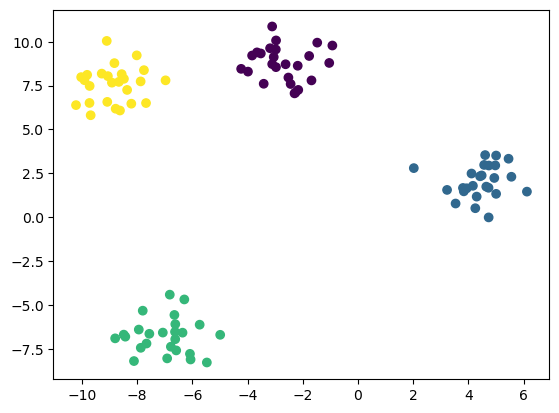

In [33]:
#Plot the data

X, y = make_blobs(centers=4, random_state=42)

print(f'Labels: {y[:10]}')
print(f'Data: {X[:10]}')

plt.scatter(X[:, 0], X[:, 1], c=y)